In [132]:
# Google Drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
# 파일 경로 정의
file_path = '/content/drive/MyDrive/Colab Notebooks/멀티캠퍼스34/final-project/How Are You 설문조사.xlsx'

In [134]:
# Excel 파일 불러오기
import pandas as pd
df = pd.read_excel(file_path)

In [135]:
df.head()

,응답자 번호,은둔형 외톨이 여부,기대되는 기능,개선점,전화번호
0,1,O,포인트 화폐,디자인,1026204711
1,2,O,포인트 화폐,스스로를 가둔 사람이 편지에 답장할 정도의 용기를 낼수 있는가 부터가 관건이고 앱의...,1037714014
2,3,O,포인트 화폐,없음,1050287045
3,4,O,편지 답변,디자인이 좀 더 세련되었으면 좋겠다,1031621772
4,5,O,포인트 화폐,처음에 앱이 무엇을 위한 앱인지 설명을 더 해주셨음 좋겠습니다 (은둔 탈출을 위한 ...,1041753144


In [136]:
df.columns

Index(['응답자 번호', '은둔형 외톨이 여부', '기대되는 기능', '개선점', '전화번호'], dtype='object')

In [137]:
# "은둔형 외톨이 여부" 컬럼의 값 빈도수 계산
value_counts = df['은둔형 외톨이 여부'].value_counts()

In [138]:
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

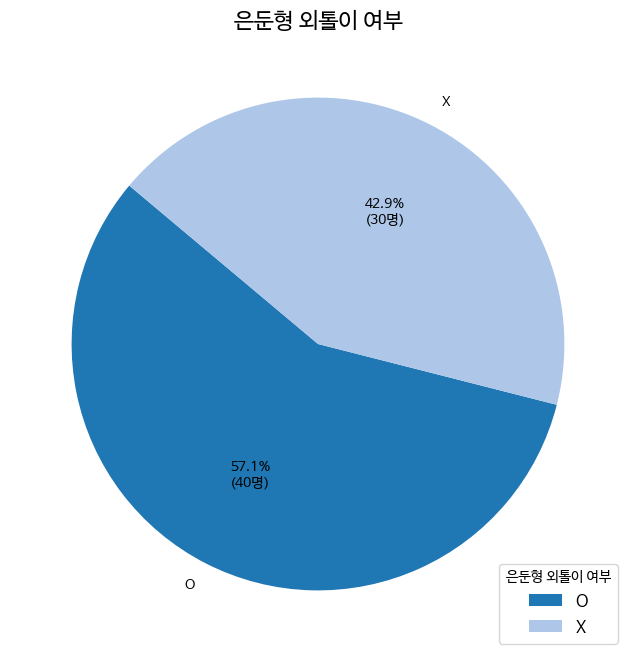

In [139]:
# "은둔형 외톨이 여부" 컬럼의 값 빈도수 계산
solitude_counts = df['은둔형 외톨이 여부'].value_counts()

# 퍼센트와 응답 개수를 함께 표시하는 함수
def func(pct, counts):
    absolute = int(pct/100.*sum(counts))
    return f"{pct:.1f}%\n({absolute}명)"

# 시각화 - 원형 그래프
plt.figure(figsize=(8, 8))
plt.pie(solitude_counts, labels=solitude_counts.index, autopct=lambda pct: func(pct, solitude_counts), startangle=140, colors=plt.cm.tab20.colors)
plt.title('은둔형 외톨이 여부', fontproperties=font_prop, fontsize=16)

# 범례 추가
plt.legend(title='은둔형 외톨이 여부', loc='lower right', prop={'size': 12})

plt.show()

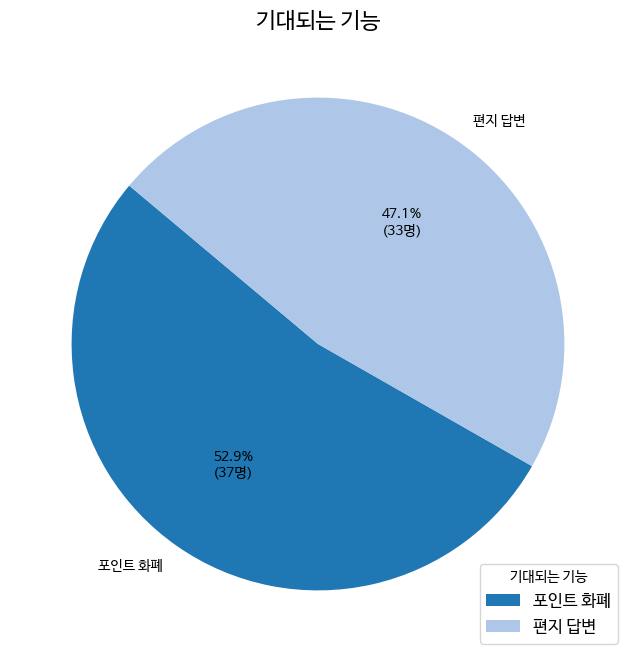

In [147]:
# "기대되는 기능" 컬럼의 값 빈도수 계산
solitude_counts = df['기대되는 기능'].value_counts()

# 퍼센트와 응답 개수를 함께 표시하는 함수
def func(pct, counts):
    absolute = round(pct/100.*sum(counts))
    return f"{pct:.1f}%\n({absolute}명)"

# 시각화 - 원형 그래프
plt.figure(figsize=(8, 8))
plt.pie(solitude_counts, labels=solitude_counts.index, autopct=lambda pct: func(pct, solitude_counts), startangle=140, colors=plt.cm.tab20.colors)
plt.title('기대되는 기능', fontproperties=font_prop, fontsize=16)

# 범례 추가
plt.legend(title='기대되는 기능', loc='lower right', prop={'size': 12})

plt.show()

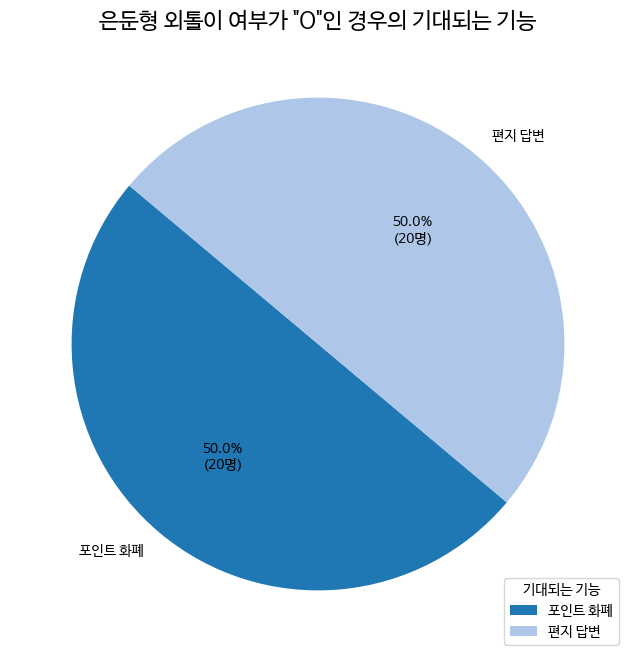

In [141]:
# '은둔형 외톨이 여부'가 'O'인 행만 필터링
filtered_df = df[df['은둔형 외톨이 여부'] == 'O']

# '은둔형 외톨이 여부'가 'O'인 경우의 '기대되는 기능' 빈도수 계산
feature_counts_O = filtered_df['기대되는 기능'].value_counts()

# 시각화 - 원형 그래프
plt.figure(figsize=(10, 8))
plt.pie(feature_counts_O, labels=feature_counts_O.index, autopct=lambda pct: annotate_percentage_and_count(pct, feature_counts_O), startangle=140, colors=plt.cm.tab20.colors)
plt.title('은둔형 외톨이 여부가 "O"인 경우의 기대되는 기능', fontsize=16)

# 퍼센트와 응답 개수를 함께 표시하는 함수
def annotate_percentage_and_count(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute}명)"

# 범례 추가
plt.legend(title='기대되는 기능', loc='lower right', fontsize=10)

plt.show()

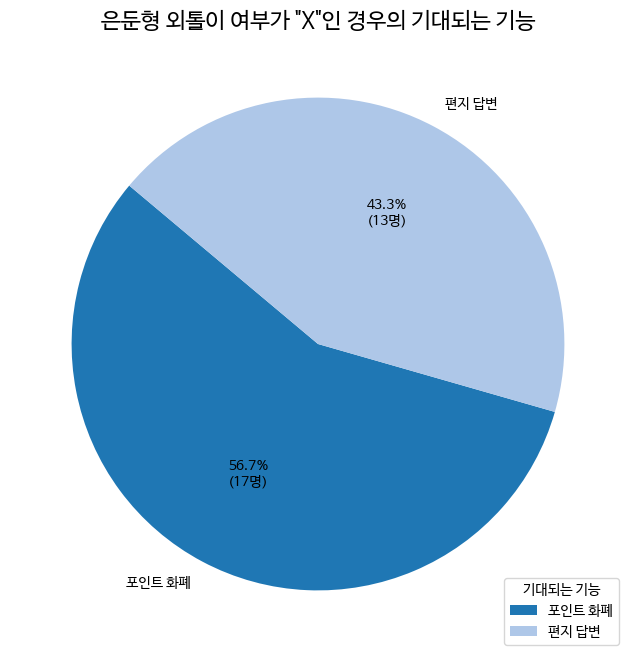

In [145]:
import math

# '은둔형 외톨이 여부'가 'X'인 행만 필터링
filtered_df = df[df['은둔형 외톨이 여부'] == 'X']

# '은둔형 외톨이 여부'가 'X'인 경우의 '기대되는 기능' 빈도수 계산
feature_counts_X = filtered_df['기대되는 기능'].value_counts()

# 퍼센트와 응답 개수를 함께 표시하는 함수
def annotate_percentage_and_count(pct, allvals):
    absolute = round(pct/100.*sum(allvals))
    if absolute == 16 and '포인트 화폐' in allvals.index:  # '포인트 화폐'에 해당하는 값이 16이면 17로 수정
        absolute = 17
    return f"{pct:.1f}%\n({absolute}명)"

# 시각화 - 원형 그래프
plt.figure(figsize=(10, 8))
plt.pie(feature_counts_X, labels=feature_counts_X.index, autopct=lambda pct: annotate_percentage_and_count(pct, feature_counts_X), startangle=140, colors=plt.cm.tab20.colors)
plt.title('은둔형 외톨이 여부가 "X"인 경우의 기대되는 기능', fontsize=16)

# 범례 추가
plt.legend(title='기대되는 기능', loc='lower right', fontsize=10)

plt.show()

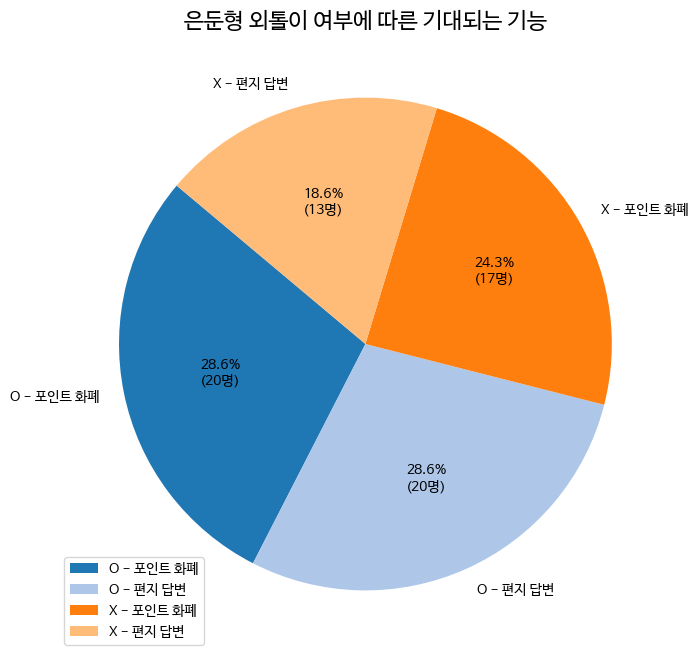

In [178]:
# 필터링 조건에 해당하는 그룹을 필터링
group_O_point = df[(df['은둔형 외톨이 여부'] == 'O') & (df['기대되는 기능'] == '포인트 화폐')]
group_O_reply = df[(df['은둔형 외톨이 여부'] == 'O') & (df['기대되는 기능'] == '편지 답변')]
group_X_point = df[(df['은둔형 외톨이 여부'] == 'X') & (df['기대되는 기능'] == '포인트 화폐')]
group_X_reply = df[(df['은둔형 외톨이 여부'] == 'X') & (df['기대되는 기능'] == '편지 답변')]

# 각 그룹의 응답 개수 계산
counts = [len(group_O_point), len(group_O_reply), len(group_X_point), len(group_X_reply)]
labels = ['O - 포인트 화폐', 'O - 편지 답변', 'X - 포인트 화폐', 'X - 편지 답변']

# 각 그룹에 대한 퍼센트 및 응답 개수 계산
total_responses = sum(counts)
percentages = [count / total_responses * 100 for count in counts]
response_labels = [f"{count}명" for count in counts]

# 시각화 - 원형 그래프
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(counts, labels=labels, autopct='', startangle=140, colors=plt.cm.tab20.colors)

# 퍼센트와 응답 개수 표시 함수
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}%\n({absolute}명)"

# 응답 개수와 퍼센트 표시
for i, autotext in enumerate(autotexts):
    autotext.set_text(func(percentages[i], counts))

plt.title('은둔형 외톨이 여부에 따른 기대되는 기능', fontsize=16)
plt.legend(labels, loc='lower left', fontsize=10)

plt.show()